# Credit Card Customer Segmentation Using K-Means and Autoencoders

---

## Table of Contents

1. [Understand the Problem Statement and Business Case](#understand-the-problem-statement-and-business-case)
2. [Import Libraries and Datasets](#import-libraries-and-datasets)
3. [Visualize and Explore Dataset](#visualize-and-explore-dataset)
4. [Apply K-Means Method](#apply-k-means-method)
5. [Apply Principal Component Analysis and Visualize the Results](#apply-principal-component-analysis-and-visualize-the-results)
6. [Apply Autoencoders for Dimensionality Reduction](#apply-autoencoders-for-dimensionality-reduction)
7. [Conclusions and Recommendations](#conclusions-and-recommendations)

---


<a name="understand-the-problem-statement-and-business-case"></a>
## 1. Understand the Problem Statement and Business Case

### Problem Statement

This project aims to develop a customer segmentation model to help define marketing strategies based on customer behavior. Using K-Means clustering, we analyze transaction patterns, spending habits, and payment behaviors. This segmentation allows us to identify distinct customer profiles, which can then be used to design targeted marketing campaigns and improve customer engagement.

### Business Case

Customer segmentation allows banks to better understand and serve their clientele by identifying high-value customers and understanding their specific needs. Proper segmentation leads to more effective, targeted marketing efforts, which improve customer satisfaction, foster loyalty, and increase bank revenue. 

### About the Dataset

This dataset contains behavioral information on approximately 9,000 active credit card holders, summarizing their usage over the past six months. It includes customer-level data across 18 behavioral variables, such as balance, purchases, payments, and cash advances.

### Data Dictionary

| Variable                           | Description                                                                                                            |
|------------------------------------|------------------------------------------------------------------------------------------------------------------------|
| `CUST_ID`                          | Identification of credit card holder (Categorical).                                                                    |
| `BALANCE`                          | Balance amount left in the account for purchases.                                                                      |
| `BALANCE_FREQUENCY`                | Frequency of balance updates (0 to 1, where 1 = frequently updated).                                                  |
| `PURCHASES`                        | Total amount of purchases made from the account.                                                                       |
| `ONEOFF_PURCHASES`                 | Maximum purchase amount done in a single transaction.                                                                  |
| `INSTALLMENTS_PURCHASES`           | Amount spent on installment purchases.                                                                                 |
| `CASH_ADVANCE`                     | Cash advance amount taken by the user.                                                                                 |
| `PURCHASES_FREQUENCY`              | Frequency of purchases (0 to 1, where 1 = frequently purchased).                                                      |
| `ONEOFFPURCHASESFREQUENCY`         | Frequency of one-off purchases (0 to 1, where 1 = frequently purchased).                                              |
| `PURCHASESINSTALLMENTSFREQUENCY`   | Frequency of installment purchases (0 to 1, where 1 = frequently done).                                               |
| `CASHADVANCEFREQUENCY`             | Frequency of cash advances taken by the user.                                                                          |
| `CASHADVANCETRX`                   | Number of transactions made with "Cash in Advance".                                                                    |
| `PURCHASES_TRX`                    | Number of purchase transactions made.                                                                                 |
| `CREDIT_LIMIT`                     | Credit limit of the credit card.                                                                                       |
| `PAYMENTS`                         | Total amount of payments made by the user.                                                                             |
| `MINIMUM_PAYMENTS`                 | Minimum amount of payments made by the user.                                                                           |
| `PRCFULLPAYMENT`                   | Percentage of full payment made by the user (0 to 1).                                                                 |
| `TENURE`                           | Tenure of the credit card service for the user (in months).                                                           |

---

<a name="import-libraries-and-datasets"></a>
## 2. Import Libraries and Datasets

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [45]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv('Marketing_data.csv')
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [46]:
# Display summary of the dataset
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

The dataset contains 18 columns and 8,950 entries, primarily numeric data, with one string identifier (`CUST_ID`). 14 columns are floats, representing financial amounts and frequencies, while 3 integer columns capture transaction counts or durations. Only `CREDIT_LIMIT` (1 missing value) and `MINIMUM_PAYMENTS` (313 missing values) have incomplete data. The dataset occupies about 1.2 MB of memory, making it a manageable size for analysis, with minimal missing data to address.

In [4]:
# Summary statistics of creditcard_df
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Key Insights:**

- **Mean Balance**: Approximately 1,564 dollars.

- **Balance Frequency**: Frequently updated, with an average of ~0.9.

- **Total Purchases**: Purchases average around 1,000 dollars, with one-off purchases averaging 600 dollars.

- **Purchases Frequency**: Average frequency of purchases is around 0.5.

- **Low Frequencies**: ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are all low, indicating infrequent transactions.

- **Credit Limit**: The average credit limit is approximately 4,500 dollars.

- **Full Payment Percentage**: On average, 15% of balances are paid in full.

- **Tenure**: The average account tenure is around 11 years.
round 11 years.
round 11 years.
round 11 years.
 customer base.
 customer base.
 customer base.


In [5]:
# Identify the customer with the highest cash advance amount
max_advance = creditcard_df['CASH_ADVANCE'].max()
creditcard_df[creditcard_df['CASH_ADVANCE'] == max_advance]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


**Key Insights**: This customer completed 123 cash advance transactions and has never fully paid off their credit card balance.

---

<a name="visualize-and-explore-dataset"></a>
## 3. Visualize and Explore Dataset

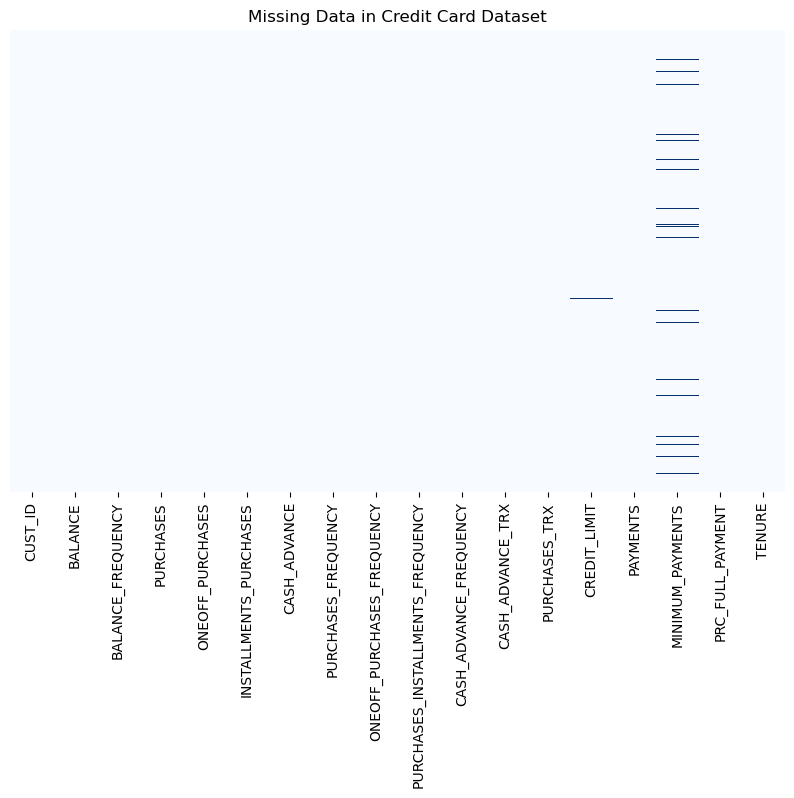

In [6]:
# Visualize missing data in the dataset
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")
plt.title("Missing Data in Credit Card Dataset")
plt.show()

In [7]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [8]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [9]:
# Check the total count of missing values in each column again
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [11]:
# Let's drop Customer ID since it has no meaning here
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [12]:
# Display the first 5 rows of the dataset to verify if the customer ID column has been removed
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


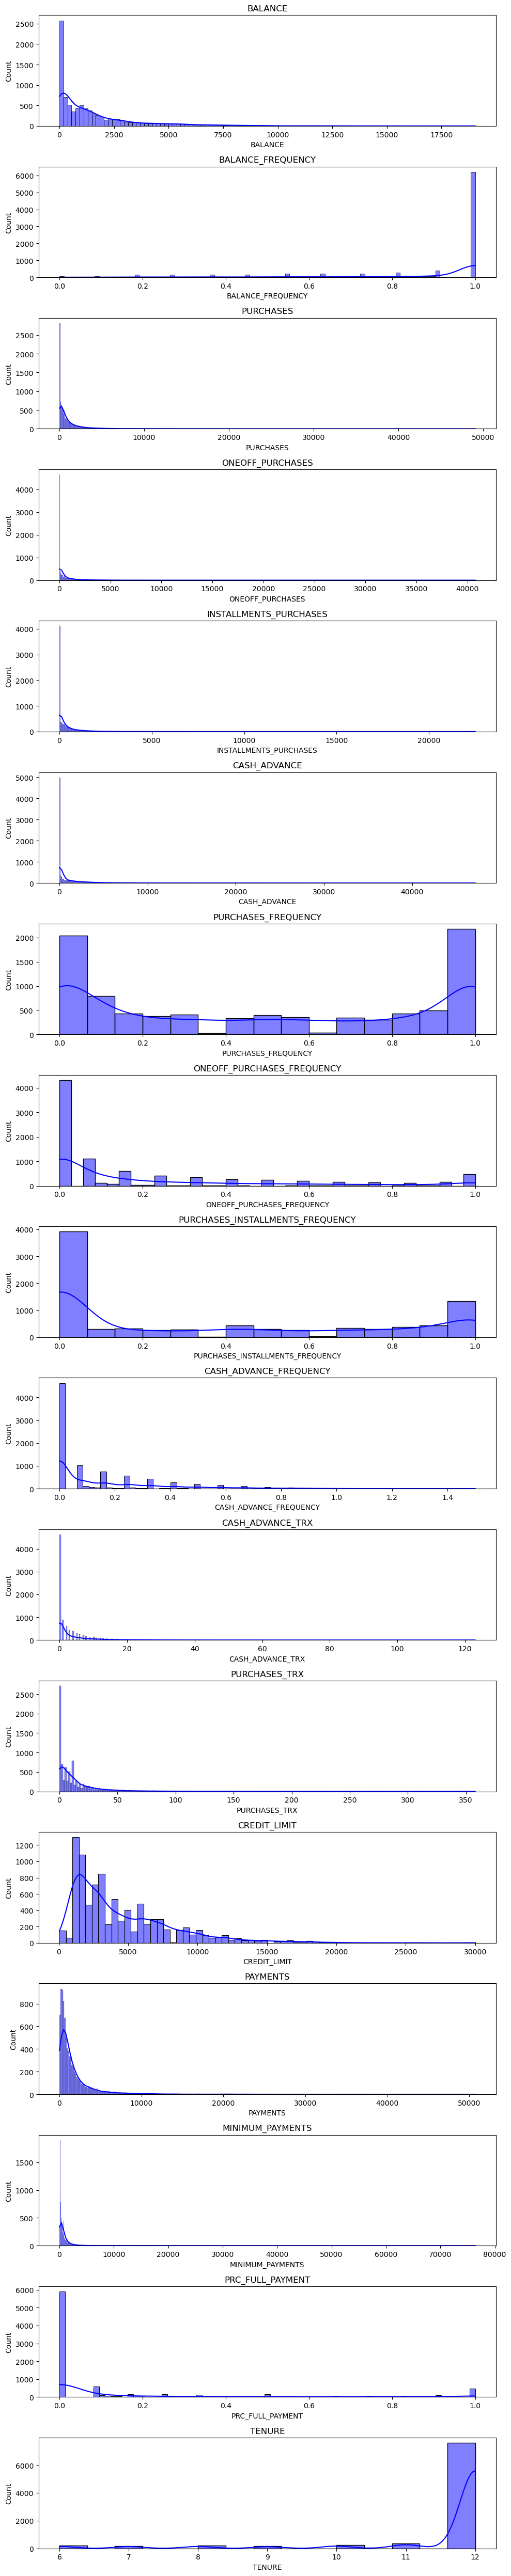

In [13]:
# Plot distribution and KDE for each column in the dataset
# - The `distplot` function combines a histogram (using matplotlib's `hist`) with a KDE plot (seaborn's `kdeplot`).
# - KDE (Kernel Density Estimate) visualizes the probability density of a continuous variable, showing likely values

# Plot distribution and KDE for each column in the dataset
plt.figure(figsize=(10, 50))
for i, column in enumerate(creditcard_df.columns):
    plt.subplot(len(creditcard_df.columns), 1, i + 1)
    sns.histplot(creditcard_df[column], kde=True, color="b")  # Set color directly in histplot
    plt.title(column)

plt.tight_layout()
plt.show()

**Key Insights:**

- **Mean Balance**: Approximately $1,500.

- **Balance Frequency**: Most accounts are frequently updated, with values close to 1.

- **Purchases Frequency**: Two distinct customer groups are observed based on purchasing frequency.

- **One-off and Installment Purchases Frequency**: Most customers have low frequencies for both, indicating infrequent one-off or installment purchases.

- **Full Payment**: Few customers pay their balance in full, as 'PRC_FULL_PAYMENT' is close to 0 for the majority.

- **Credit Limit**: The average credit limit is around $4,500.

- **Tenure**: Most customers have a tenure of approximately 11 years, indicating long-term relationships.


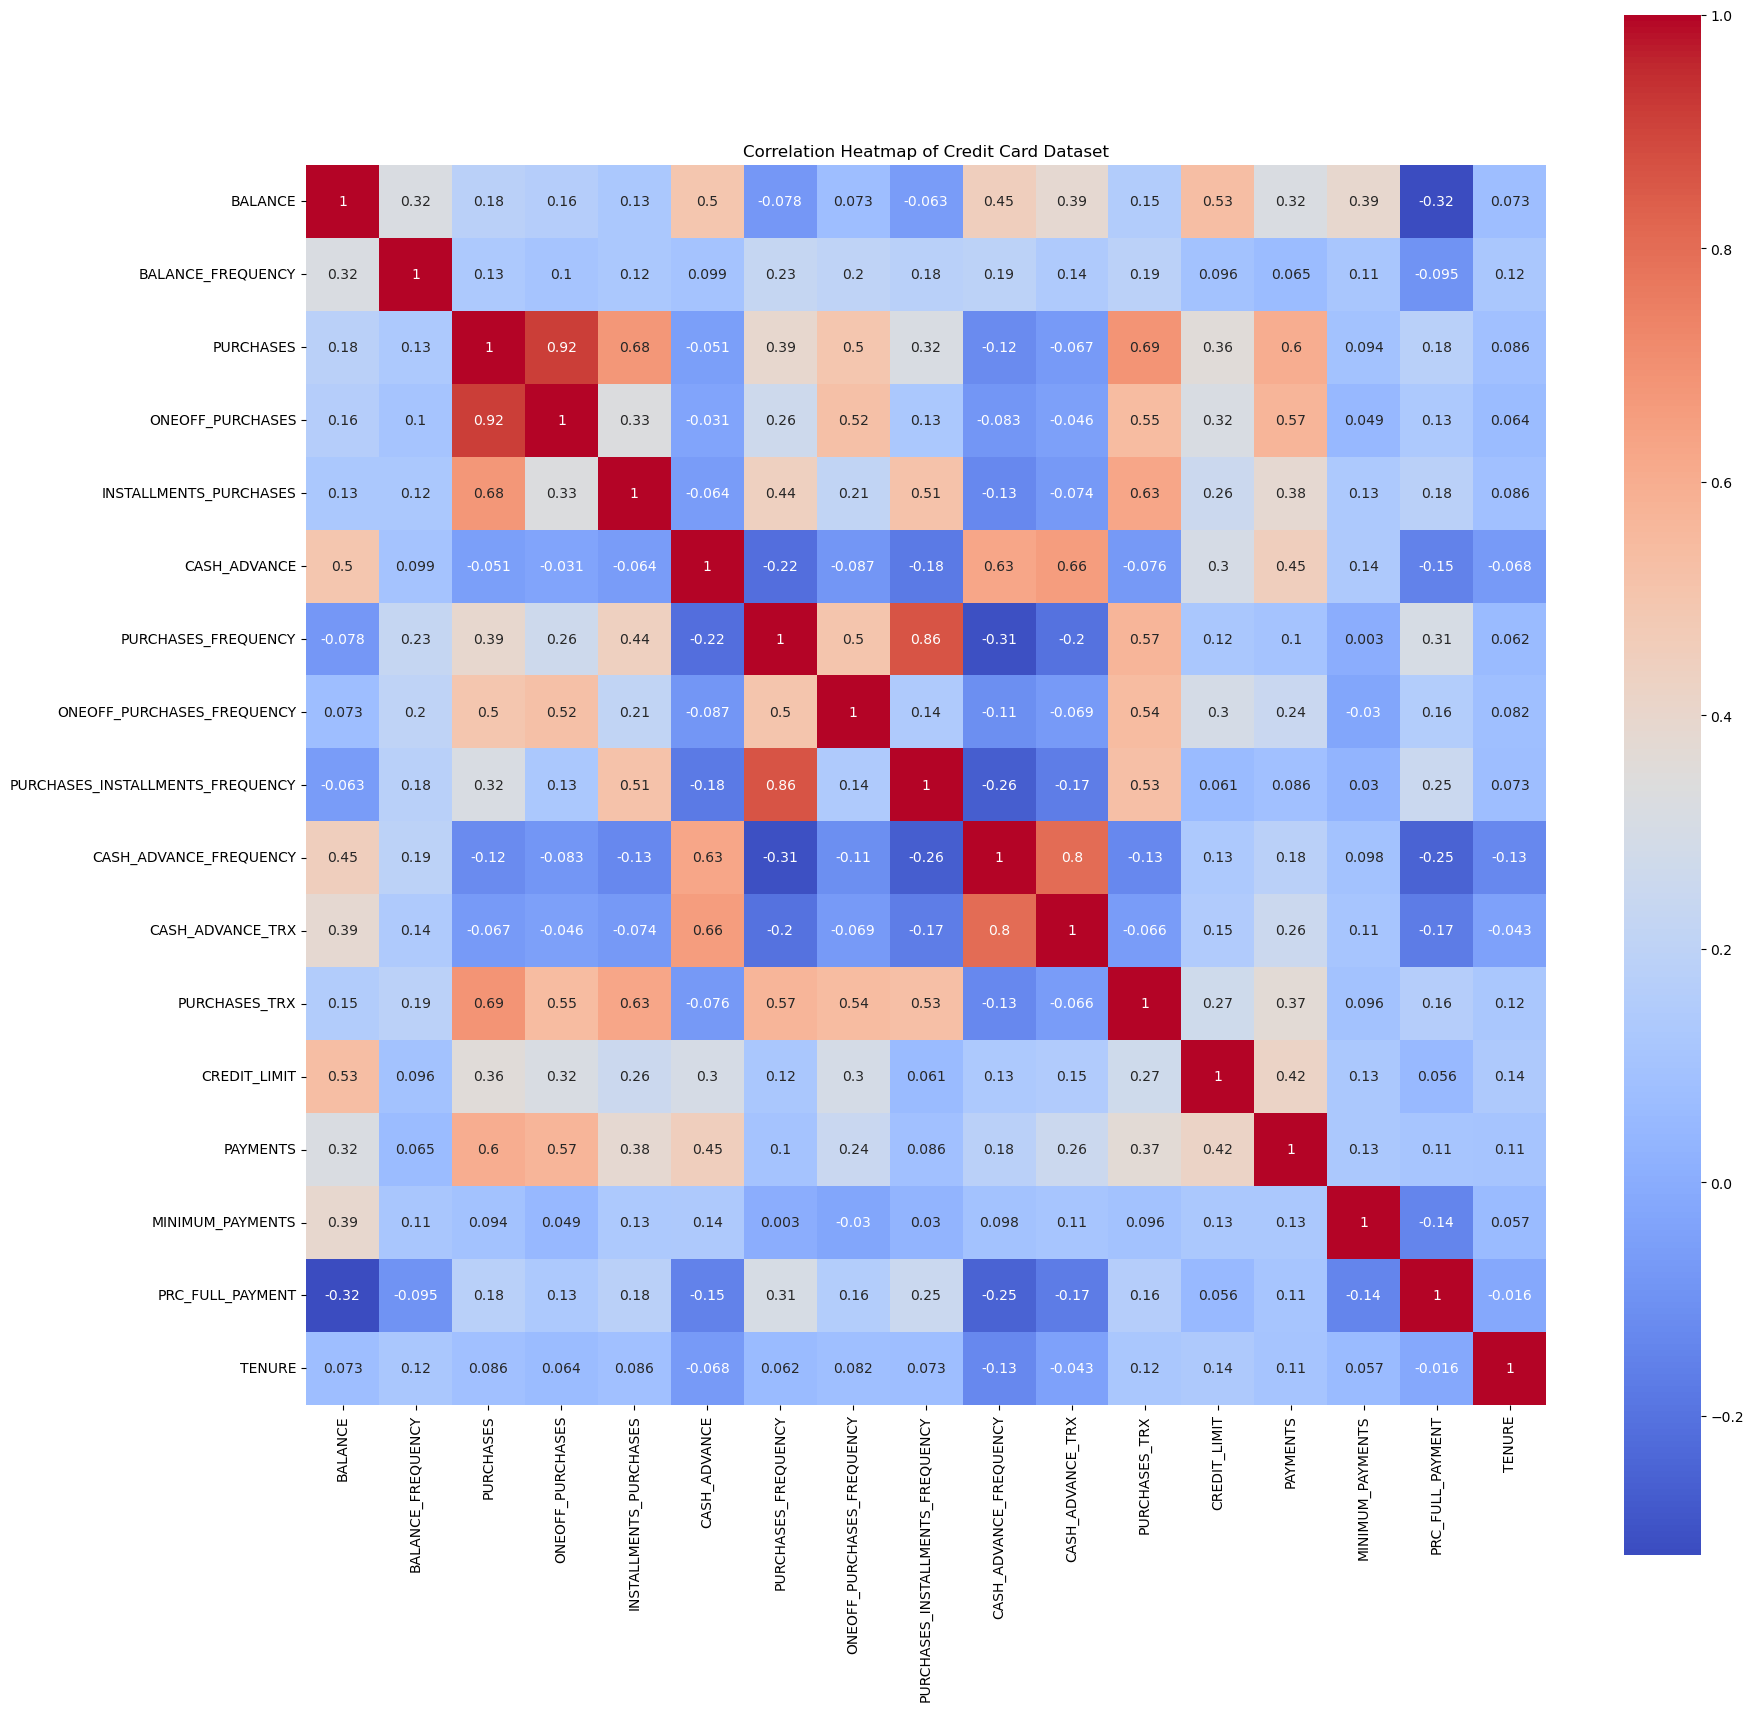

In [14]:
# Calculate correlation matrix for the credit card dataset
correlations = creditcard_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlations, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Credit Card Dataset")
plt.show()


- **Purchases Correlation**: There is a strong correlation between 'PURCHASES' and both 'ONEOFF_PURCHASES' and 'INSTALLMENTS_PURCHASES'.

- **Credit Limit and Payments**: 'PURCHASES' also shows a notable correlation with 'CREDIT_LIMIT' and 'PAYMENTS', indicating a trend between spending and available credit/payment behavior.

- **Frequency of Purchases**: 'PURCHASES_FREQUENCY' has a strong positive correlation with 'PURCHASES_INSTALLMENT_FREQUENCY', suggesting that frequent purchasers are also likely to use installments.


---

<a name="apply-k-means-method"></a>
## 4. Apply K-Means Method

In [15]:
# Scale the data using StandardScaler
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

# Display the scaled data
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [16]:
# Display the dimensions of the scaled credit card dataset
creditcard_df_scaled.shape

(8950, 17)

#### Find the Optimal Number of Clusters Using the Elbow Method

- The **Elbow Method** is a heuristic approach for determining the optimal number of clusters in a dataset during cluster analysis. It aids in assessing the consistency of clustering by plotting the sum of squared distances from each point to its assigned cluster center (inertia) for different values of *k* (number of clusters). 

- When visualized on a line chart, if the plot resembles an arm, the "elbow" point (where the curve starts to flatten) indicates the ideal value of *k*. This point represents the best trade-off between minimizing within-cluster variance and avoiding overfitting.

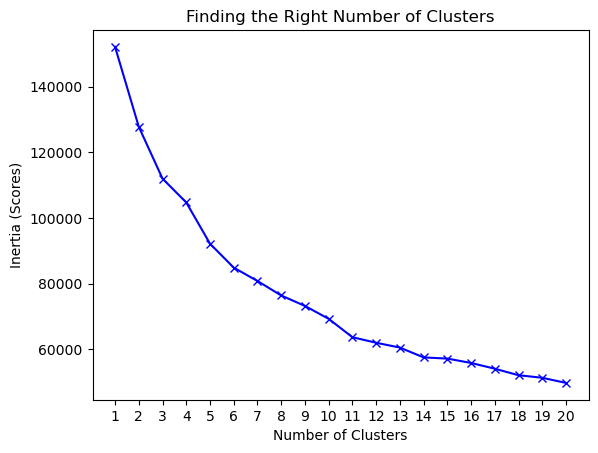

In [17]:
# Initialize an empty list to store inertia scores
scores_1 = []

# Define the range for the number of clusters
range_values = range(1, 21)  # Change range to 1 to 21 to include 20 clusters

# Calculate the inertia for each number of clusters
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)

# Plot the inertia scores
plt.plot(range_values, scores_1, 'bx-')  # Use range_values for x-axis
plt.xticks(range(1, 21))  # Set x-axis ticks to show 1 to 20
plt.title('Finding the Right Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Scores)')
plt.show()

- From the plot, it appears that the **4th cluster** forms the "elbow" of the curve, indicating a potential optimal point. However, the decrease in values continues non-linearly until the **8th cluster**.

- Based on this observation, we’ll set the number of clusters to **7** to balance between clustering effectiveness and avoiding overfitting.
.


In [18]:
# Initialize and fit KMeans with 8 clusters
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)

# Get cluster labels for each data point
labels = kmeans.labels_

In [19]:
# Display the shape of the cluster centers from the KMeans model
kmeans.cluster_centers_.shape

(8, 17)

In [20]:
# Create a DataFrame for the KMeans cluster centers with column names from the original dataset
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=creditcard_df.columns)

# Display the cluster centers DataFrame
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.411900,0.185885,-0.057503,-0.240948,0.306528,-0.377983,0.964131,-0.368057,1.160414,-0.493226,-0.373259,0.152578,-0.293132,-0.239533,-0.086547,0.344667,0.268597
1,-0.340457,-0.392827,-0.327216,-0.214765,-0.378969,-0.261470,-0.748234,-0.334929,-0.698362,-0.255378,-0.249904,-0.453209,-0.336034,-0.257838,-0.161529,-0.232126,0.274477
2,1.820631,0.368457,0.000180,-0.010984,0.020254,3.607188,-0.212505,0.014447,-0.170913,2.568405,3.512707,0.009140,1.269656,2.186524,0.554458,-0.262969,0.075316
3,1.201912,0.447641,-0.311519,-0.228465,-0.316909,0.825606,-0.687935,-0.356209,-0.589545,1.192652,0.862218,-0.392521,0.577519,0.131855,0.600585,-0.454964,0.283271
4,-0.557649,-0.632749,-0.249663,-0.190670,-0.239518,-0.303061,0.045060,-0.248507,-0.036479,-0.303447,-0.325141,-0.348599,-0.640154,-0.435258,-0.234104,0.262926,-3.079510
5,1.488505,0.403475,7.413638,6.553369,5.486972,0.028557,1.072872,1.875094,1.028264,-0.309559,-0.107750,4.914457,2.259343,5.133194,0.782295,0.828775,0.330386
6,0.241696,-0.051708,-0.347543,-0.238188,-0.384268,0.979984,-0.726415,-0.323563,-0.658365,1.666798,0.836496,-0.457214,-0.178102,-0.223950,-0.116364,-0.404293,-2.867615
7,0.138418,0.435588,0.978758,0.920989,0.622205,-0.299277,1.109704,1.876467,0.567344,-0.393569,-0.304976,1.237027,0.708123,0.418800,-0.047601,0.454937,0.306925


In [21]:
# Perform inverse transformation to interpret the cluster centers in the original scale
cluster_centers = scaler.inverse_transform(cluster_centers)

# Convert the inverse-transformed cluster centers back into a DataFrame with original column names
cluster_centers = pd.DataFrame(data=cluster_centers, columns=creditcard_df.columns)

# Display the cluster centers DataFrame in the original scale
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,707.139035,0.921305,880.348277,192.512805,688.257229,186.222281,0.877303,0.092659,0.825615,0.036445,0.701605,18.502361,3427.914532,1039.717993,662.513558,0.254524,11.876771
1,855.841454,0.784214,304.102304,235.971515,68.371129,430.556492,0.190048,0.102542,0.086890,0.084040,1.543412,3.444748,3271.818458,986.728318,487.769754,0.085822,11.884639
2,5353.963901,0.964555,1003.589449,574.206024,429.383425,8543.312109,0.405062,0.206768,0.296512,0.649108,27.220472,14.937008,9113.976378,8062.915490,2156.346395,0.076801,11.618110
3,4066.153526,0.983313,337.638672,213.232849,124.490760,2710.205901,0.214249,0.096194,0.130137,0.373806,9.132832,4.953216,6595.701375,2114.851288,2263.844080,0.020646,11.896408
4,403.775098,0.727378,469.795717,275.963619,194.474497,343.338716,0.508435,0.128323,0.349940,0.074421,1.029979,6.044968,2165.305745,473.114633,318.637972,0.230616,7.396146
5,4662.671853,0.972850,16842.556892,11469.688108,5372.868784,1038.757441,0.920946,0.761835,0.773096,0.073198,2.513514,136.864865,12714.864865,16593.236130,2687.311037,0.396117,11.959459
6,2067.545316,0.865021,260.673238,197.094591,63.578648,3033.942640,0.198805,0.105933,0.102786,0.468687,8.957295,3.345196,3846.441281,1084.829562,593.025769,0.035466,7.679715
7,1852.580205,0.980458,3094.335510,2121.089818,973.720000,351.274094,0.935728,0.762244,0.589914,0.056387,1.167589,45.457708,7070.891125,2945.528099,753.274886,0.286776,11.928063


#### Combined Cluster Descriptions

##### 1. **Low Engagement Customers**
   - **Clusters Included**: Clusters 5 and 7
   - **Characteristics**:
     - Minimal spending and low cash advance usage
     - Low balances and moderate percentages of full payments
   - **Description**: These customers are infrequent users who do not rely heavily on their credit cards. They may benefit from introductory offers or targeted promotions to encourage greater engagement and regular usage.

##### 2. **Cash Advance-Focused Users**
   - **Clusters Included**: Clusters 2 and 3
   - **Characteristics**:
     - High reliance on cash advances with moderate to high balances
     - Occasional purchases and low percentages of full payments
   - **Description**: This group frequently uses their credit cards for cash advances and tends to carry high balances. They would benefit from targeted financial support, such as lower interest rates on cash advances, structured repayment options, or financial education on managing credit.

##### 3. **Moderate Spenders with Installment Payments**
   - **Clusters Included**: Clusters 0 and 4
   - **Characteristics**:
     - Moderate balances with regular purchases, especially in installments
     - Frequent payments with a moderate likelihood of paying in full
   - **Description**: These are responsible, moderate users who frequently use their credit cards for purchases and installment payments. They could be targeted with loyalty rewards or installment-based offers to reinforce their payment behaviors.

##### 4. **High-Spending, High-Value Customers**
   - **Clusters Included**: Clusters 1 and 6
   - **Characteristics**:
     - High balances with significant spending amounts
     - High payment amounts, especially in Cluster 6, with a substantial full payment ratio
   - **Description**: These are VIP customers with high spending and strong payment patterns. Premium rewards, exclusive perks, and personalized services could be offered to retain and reward their loyalty.

#### Summary

| Category                          | Clusters Combined | Key Traits                                                                                         | Targeted Strategies                                               |
|-----------------------------------|-------------------|----------------------------------------------------------------------------------------------------|-------------------------------------------------------------------|
| **Low Engagement Customers**      | Clusters 5, 7    | Low balances, low spending, minimal engagement                                                     | Introductory offers, promotions for increased usage               |
| **Cash Advance-Focused Users**    | Clusters 2, 3    | High cash advances, low full payments, high balances                                               | Support with cash advance rates, repayment options, financial education |
| **Moderate Spenders with Installments** | Clusters 0, 4 | Moderate balances, frequent purchases, and installment payments                                    | Loyalty rewards, installment-based offers                         |
| **High-Spending, High-Value Customers** | Clusters 1, 6 | High balances, high spending, strong payment behavior                                              | Premium rewards, personalized services, exclusive perks           |

These combined clusters simplify customer segmentation, allowing for focused, actionable strategies tailored to each group’s characteristics and needs.


In [22]:
# Display the shape of the labels array, representing the cluster label assigned to each data point
labels.shape

(8950,)

In [23]:
# Get the highest cluster label assigned in the dataset
labels.max()

7

In [24]:
# Get the lowest cluster label assigned in the dataset
labels.min()

0

In [25]:
# Fit the KMeans model to the scaled dataset and obtain cluster predictions for each data point
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

# Display the predicted cluster labels
y_kmeans

array([3, 4, 1, ..., 0, 0, 0])

In [26]:
# Add the cluster labels to the original DataFrame
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis=1)

# Display the first few rows of the updated DataFrame
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


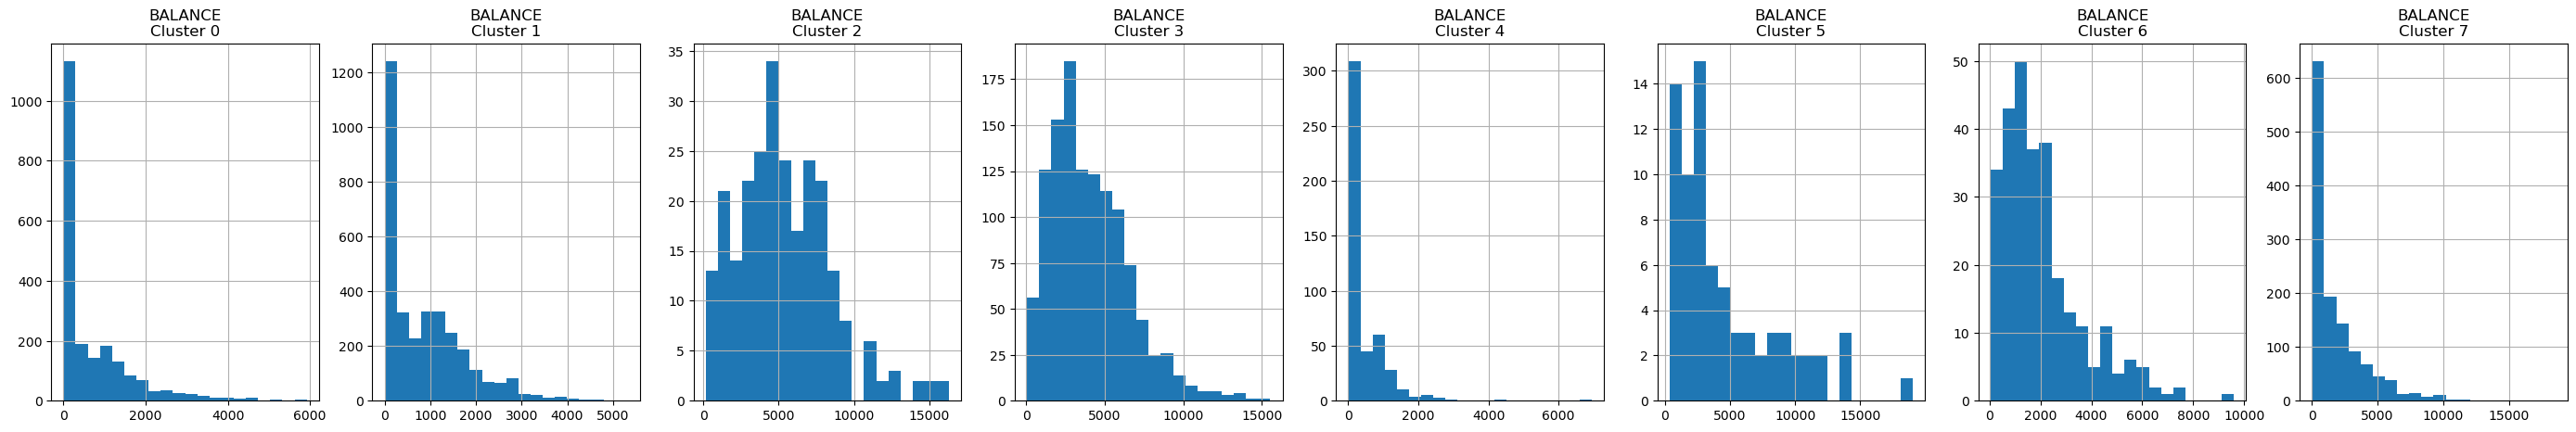

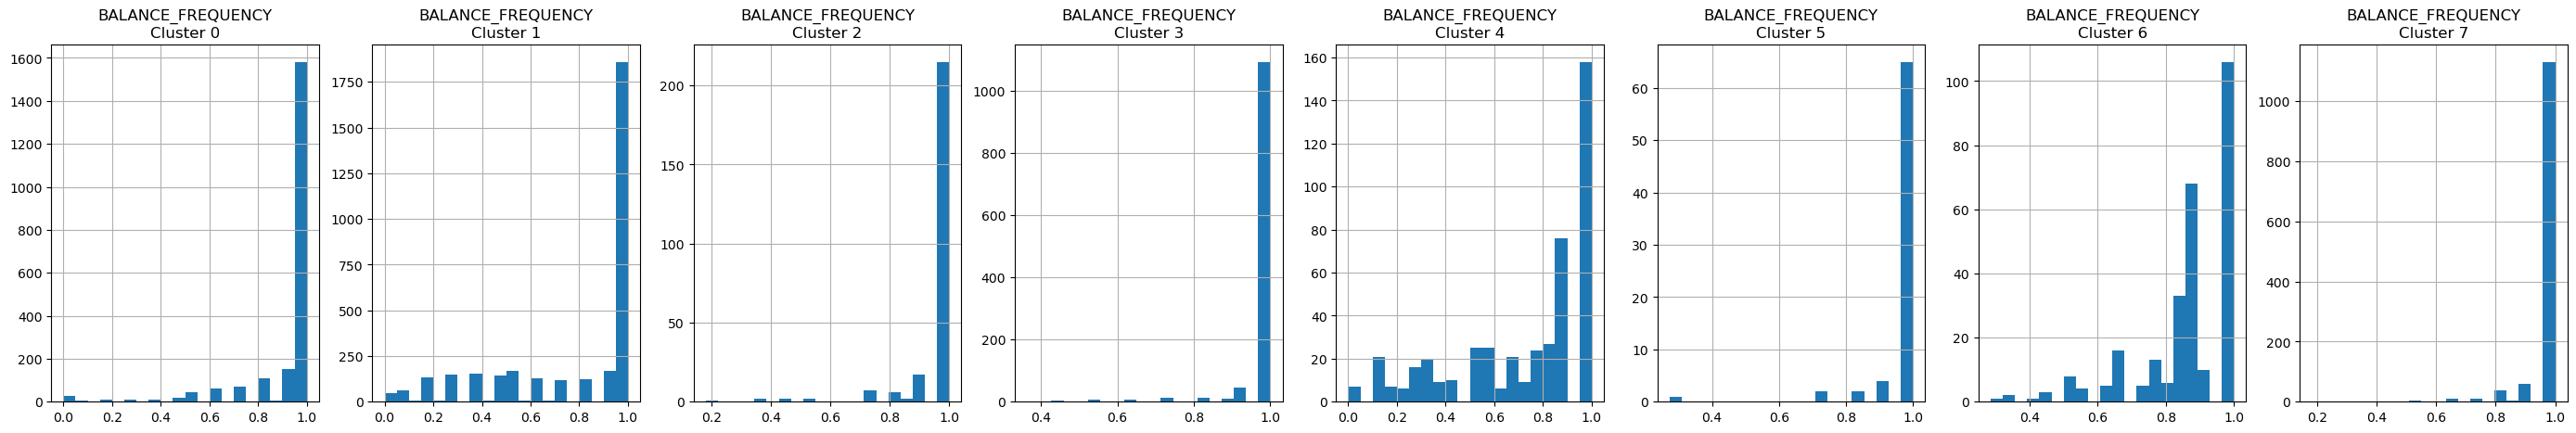

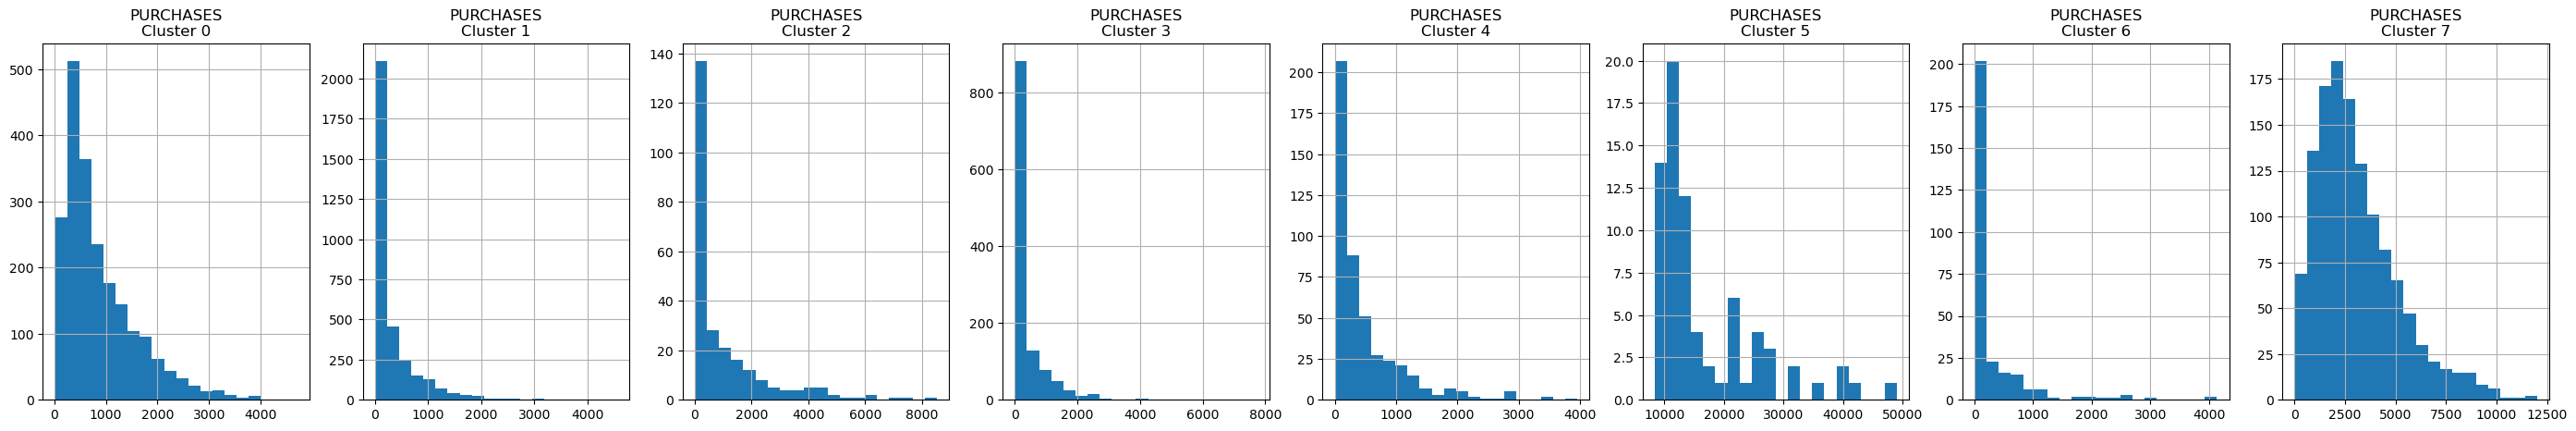

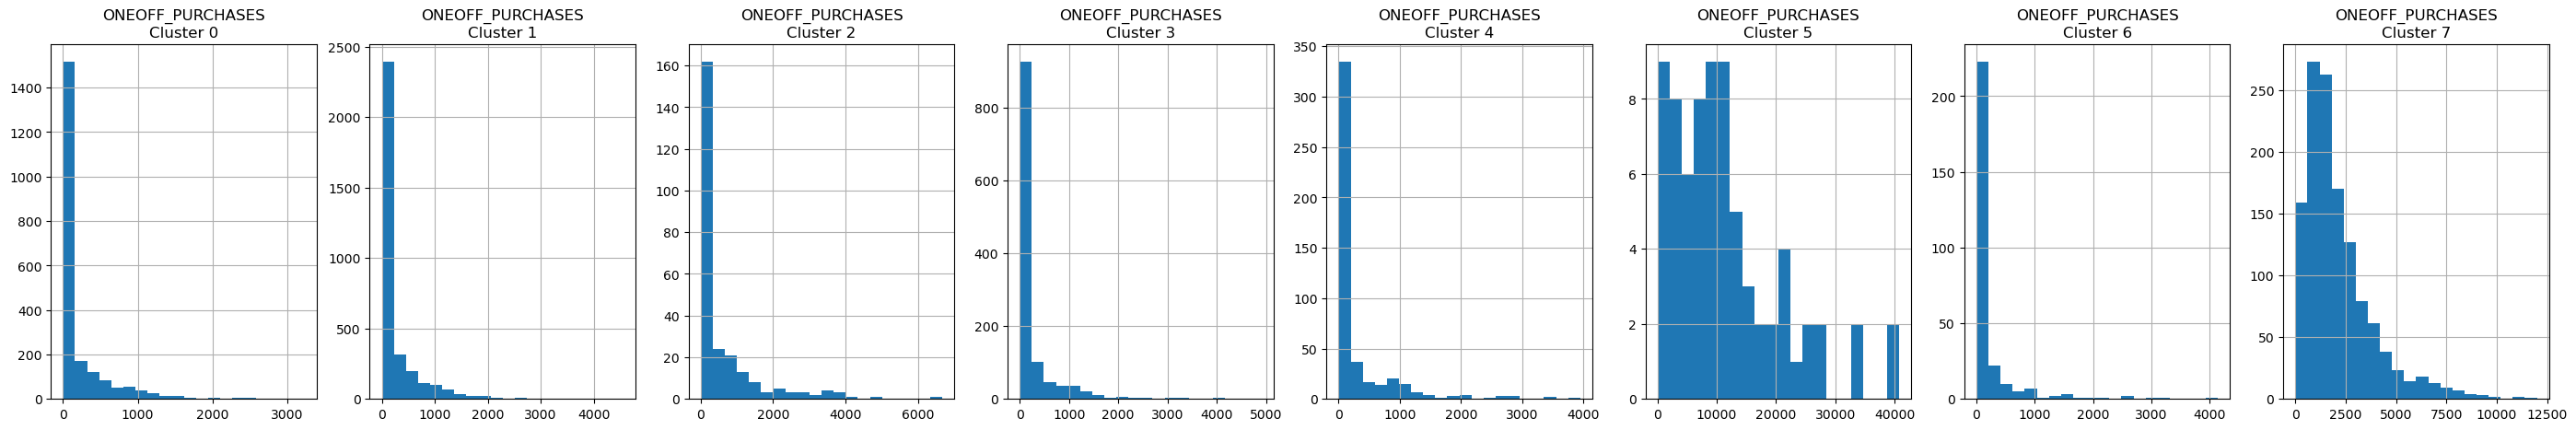

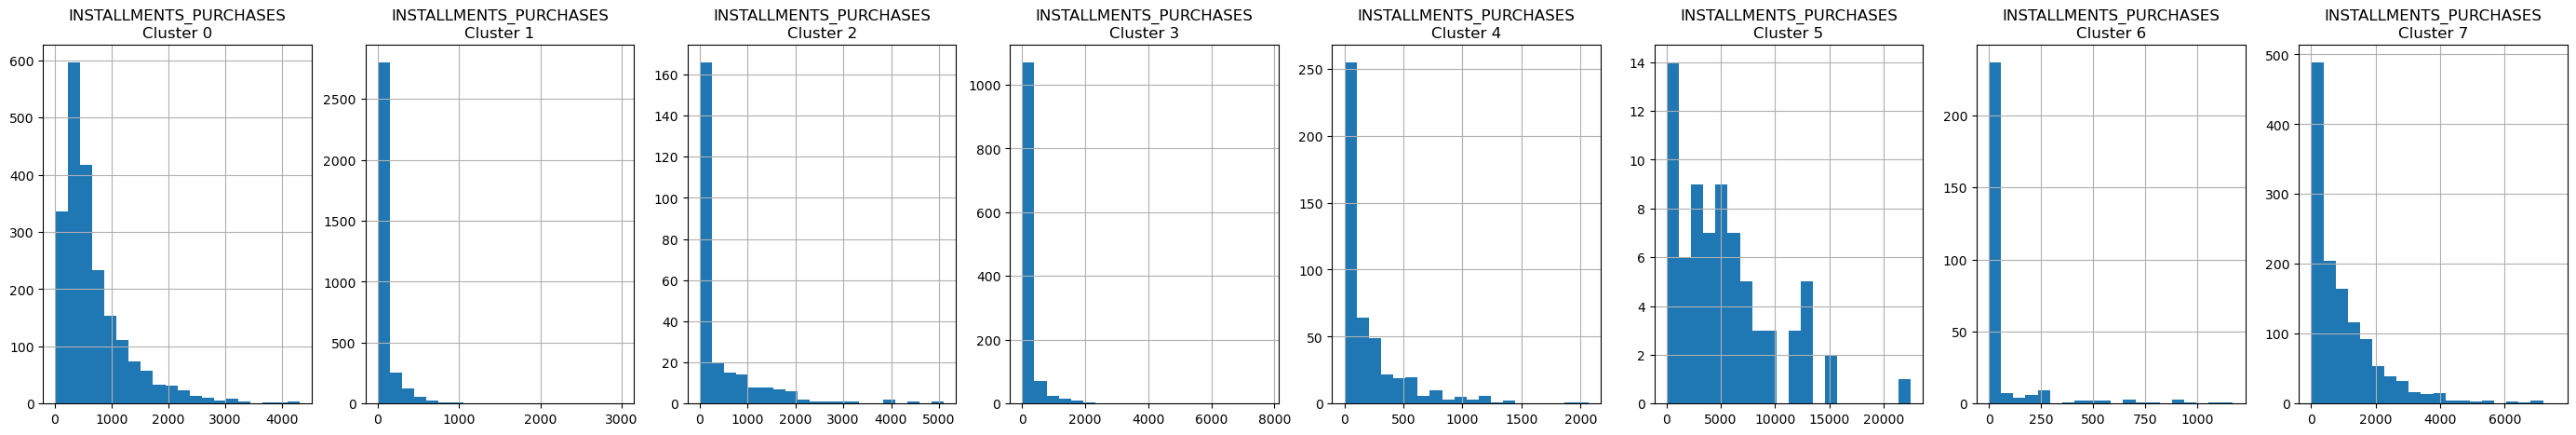

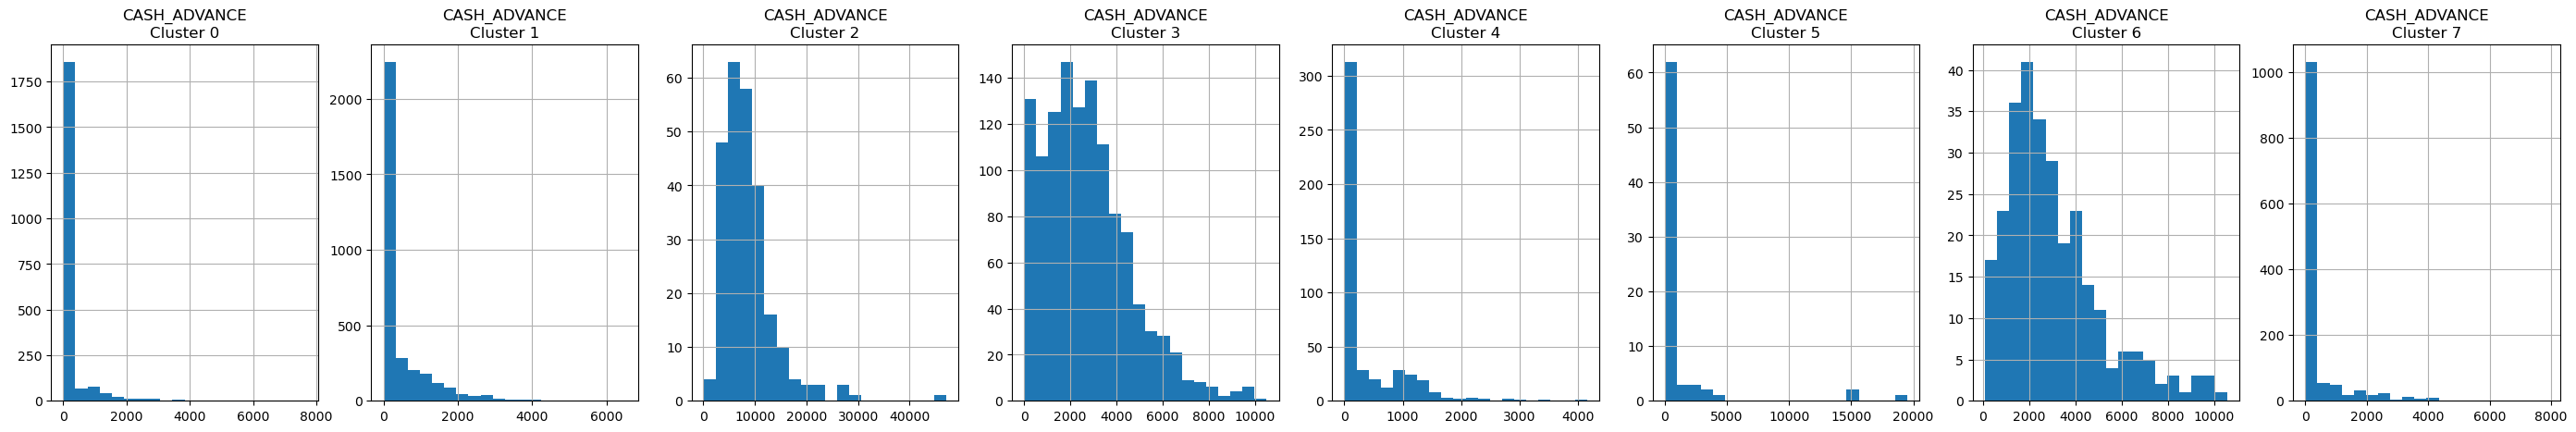

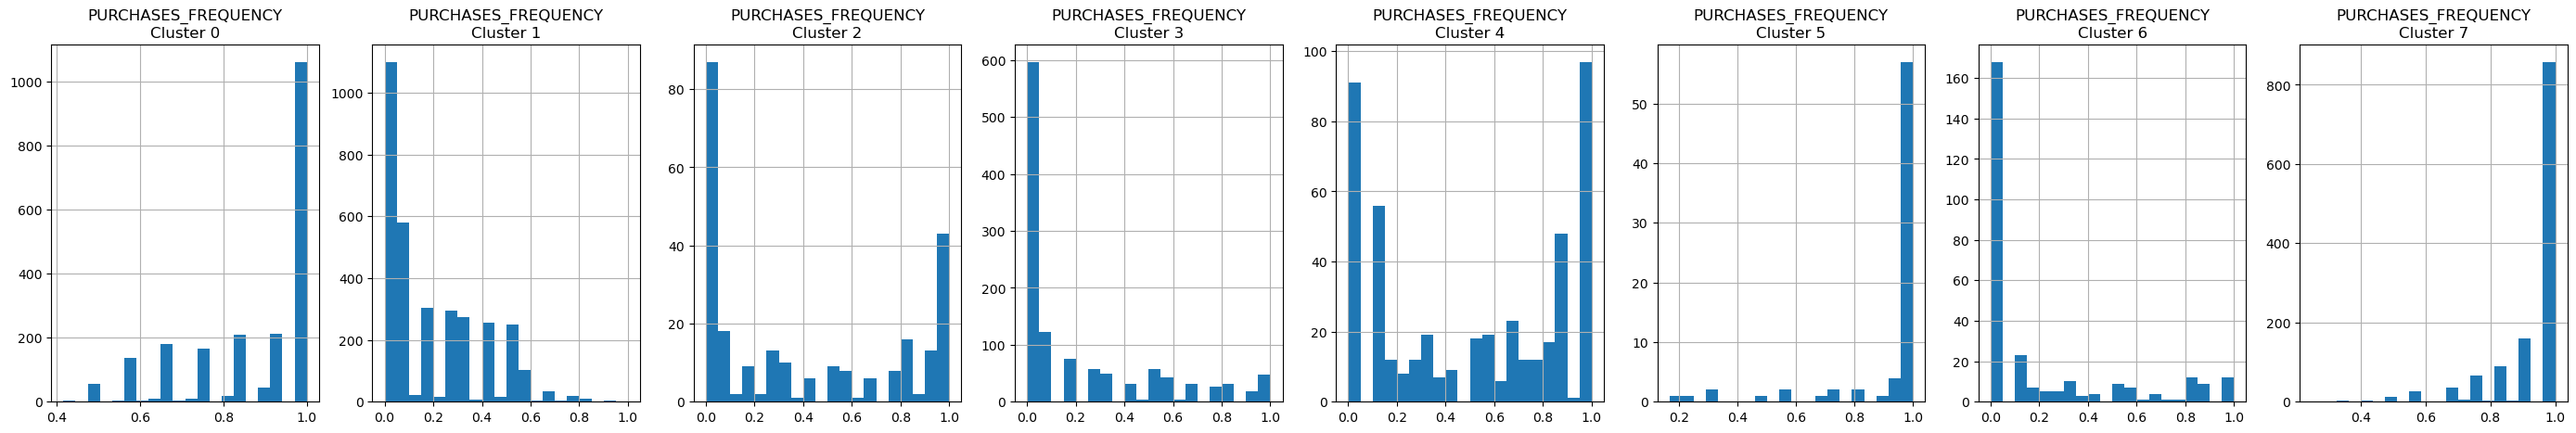

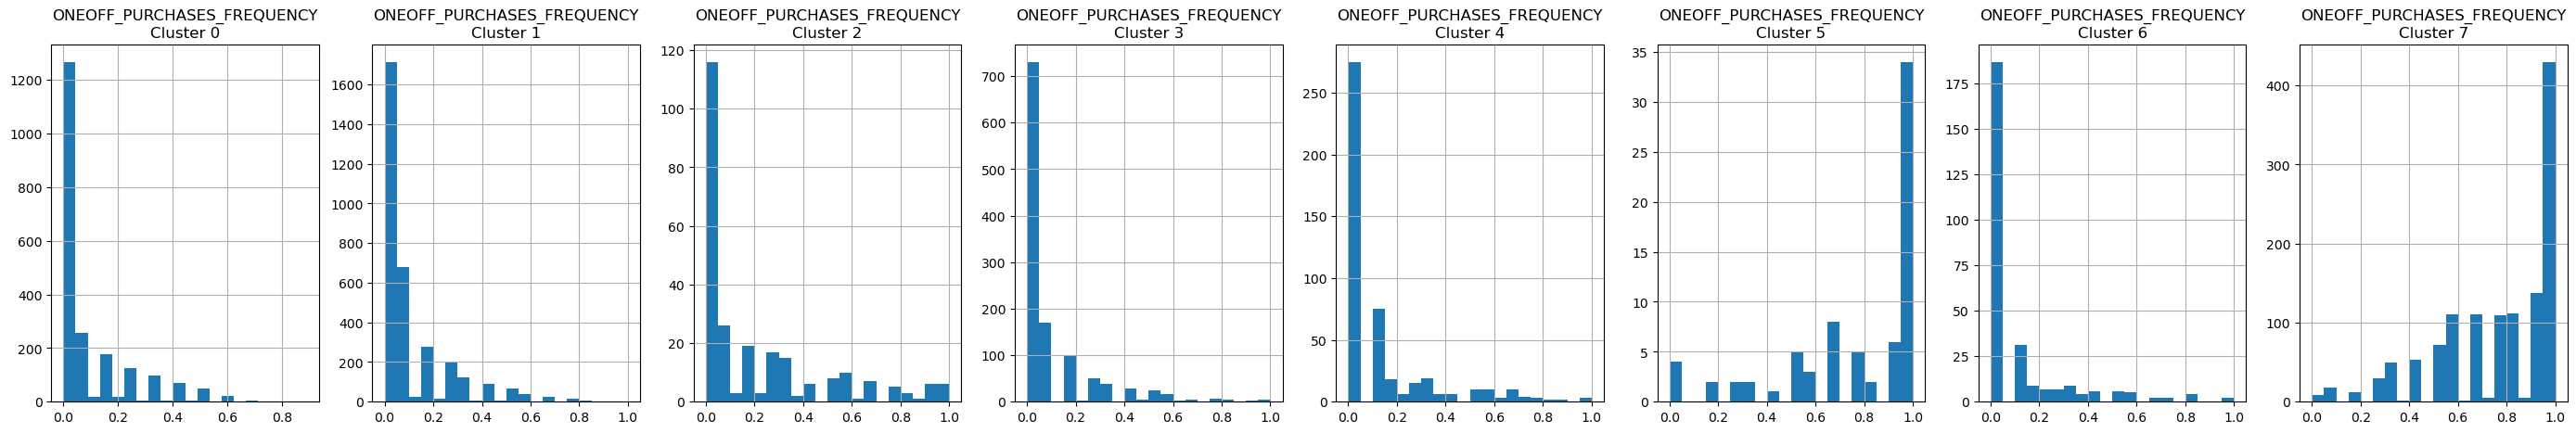

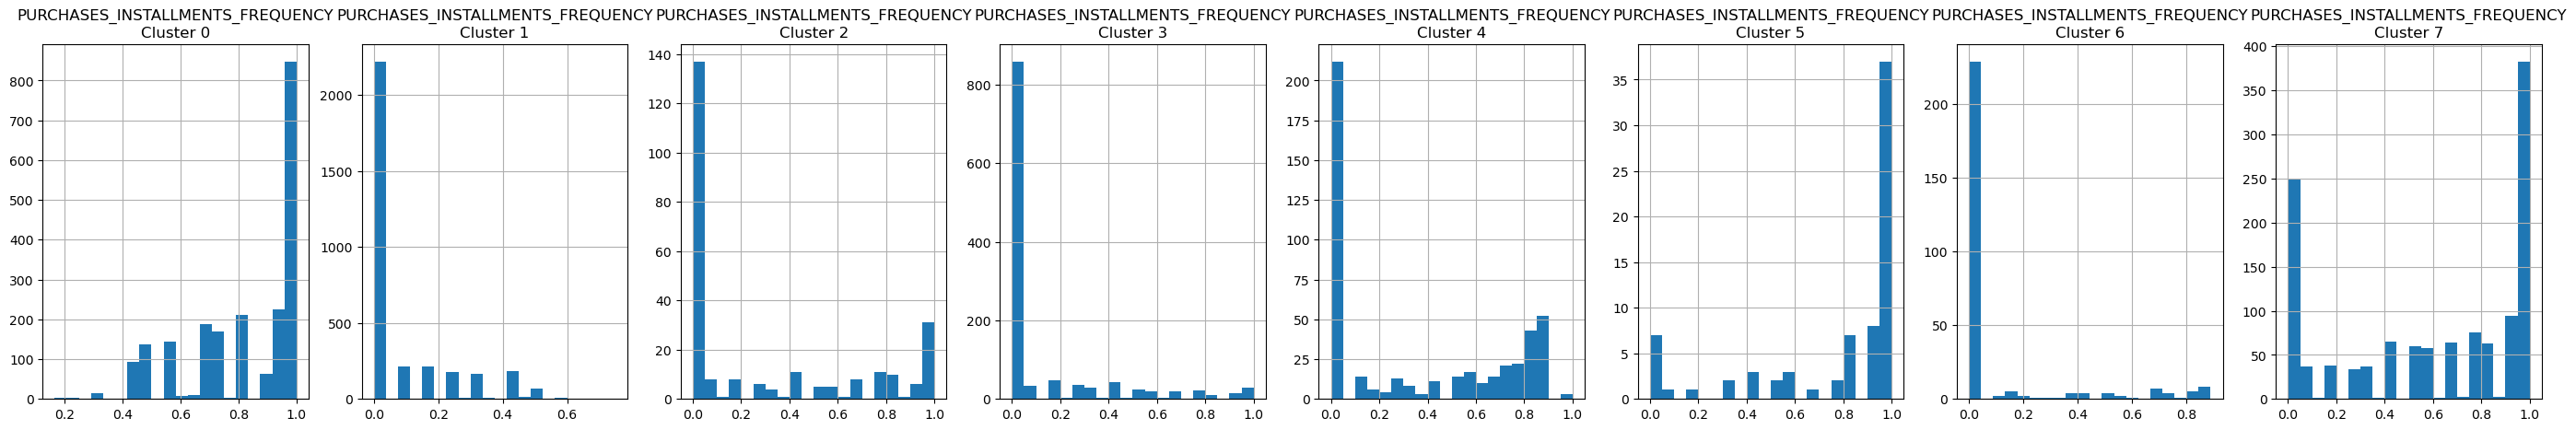

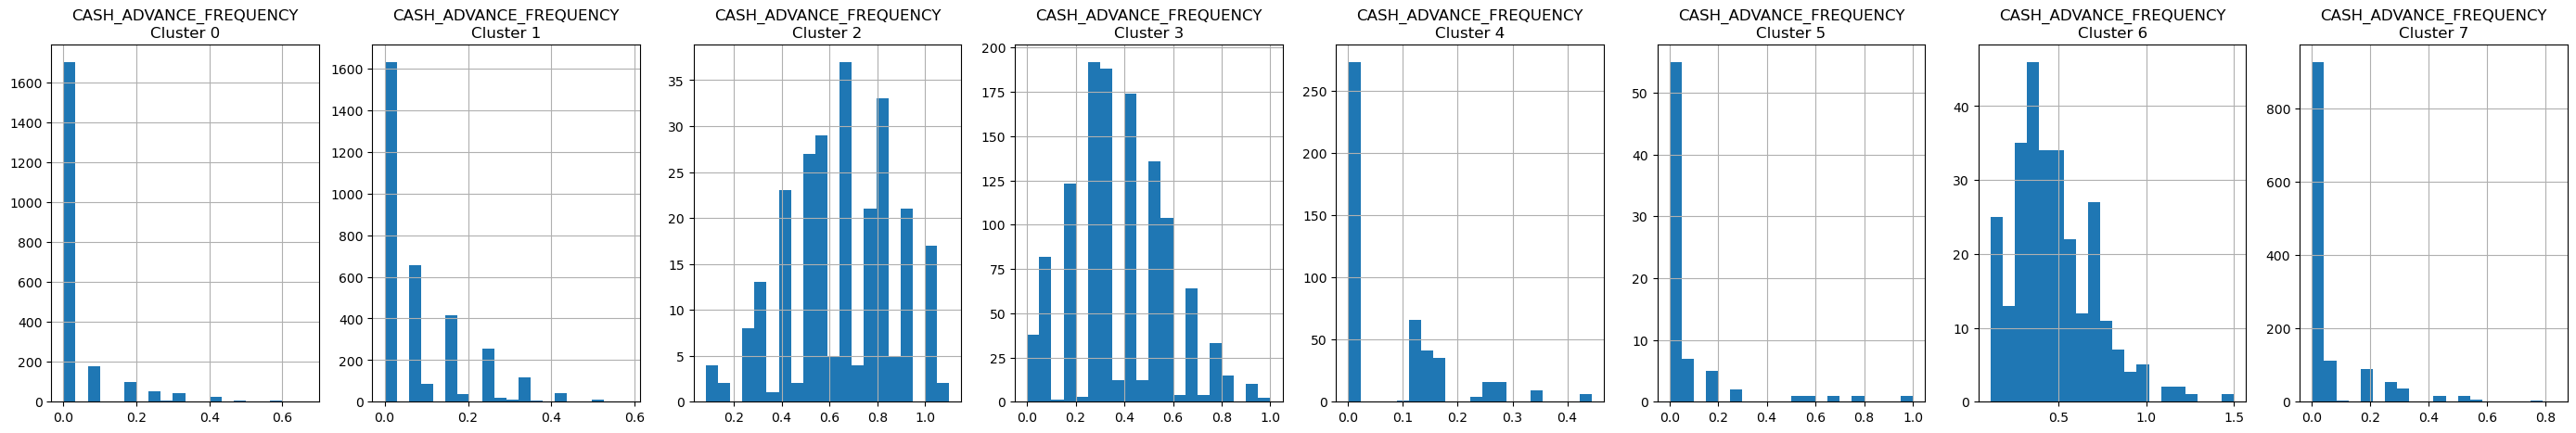

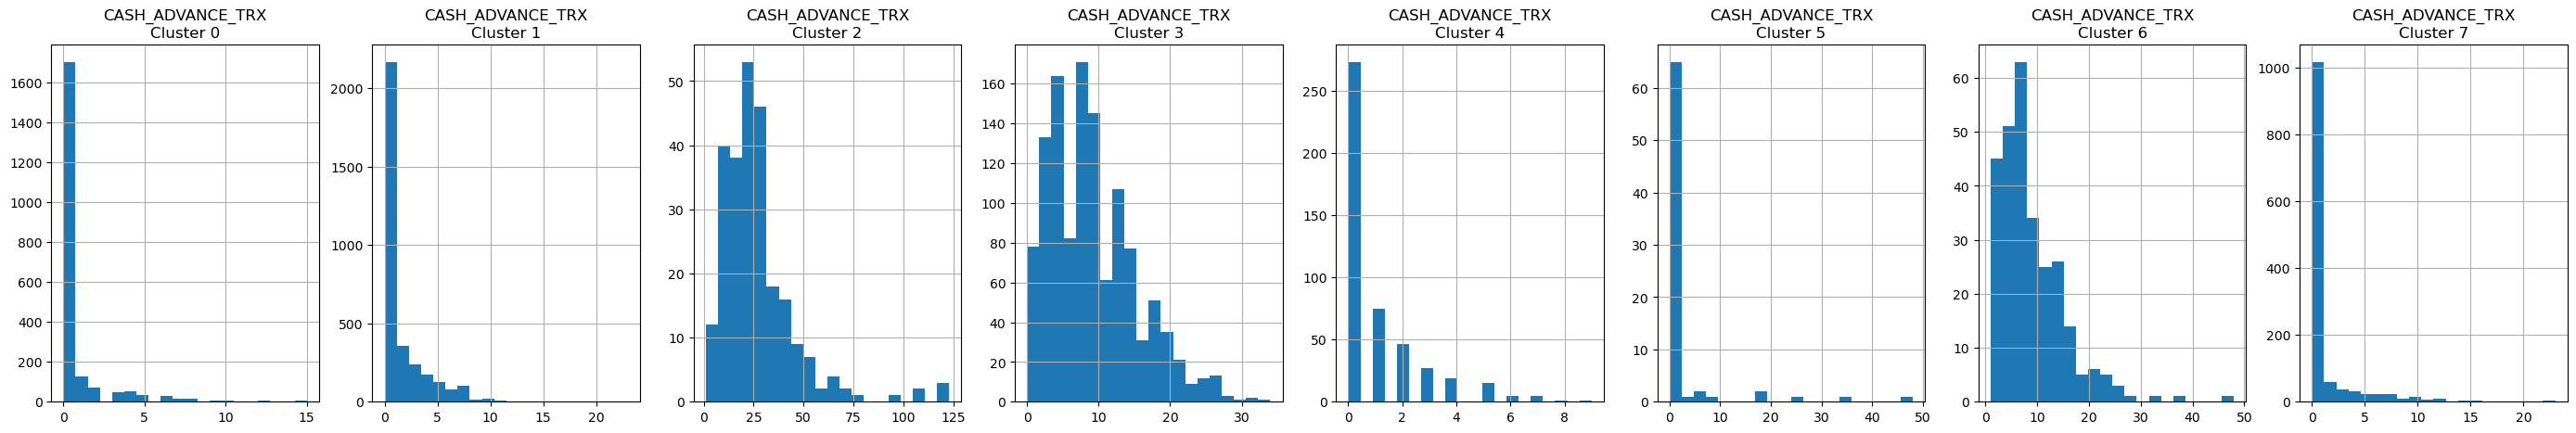

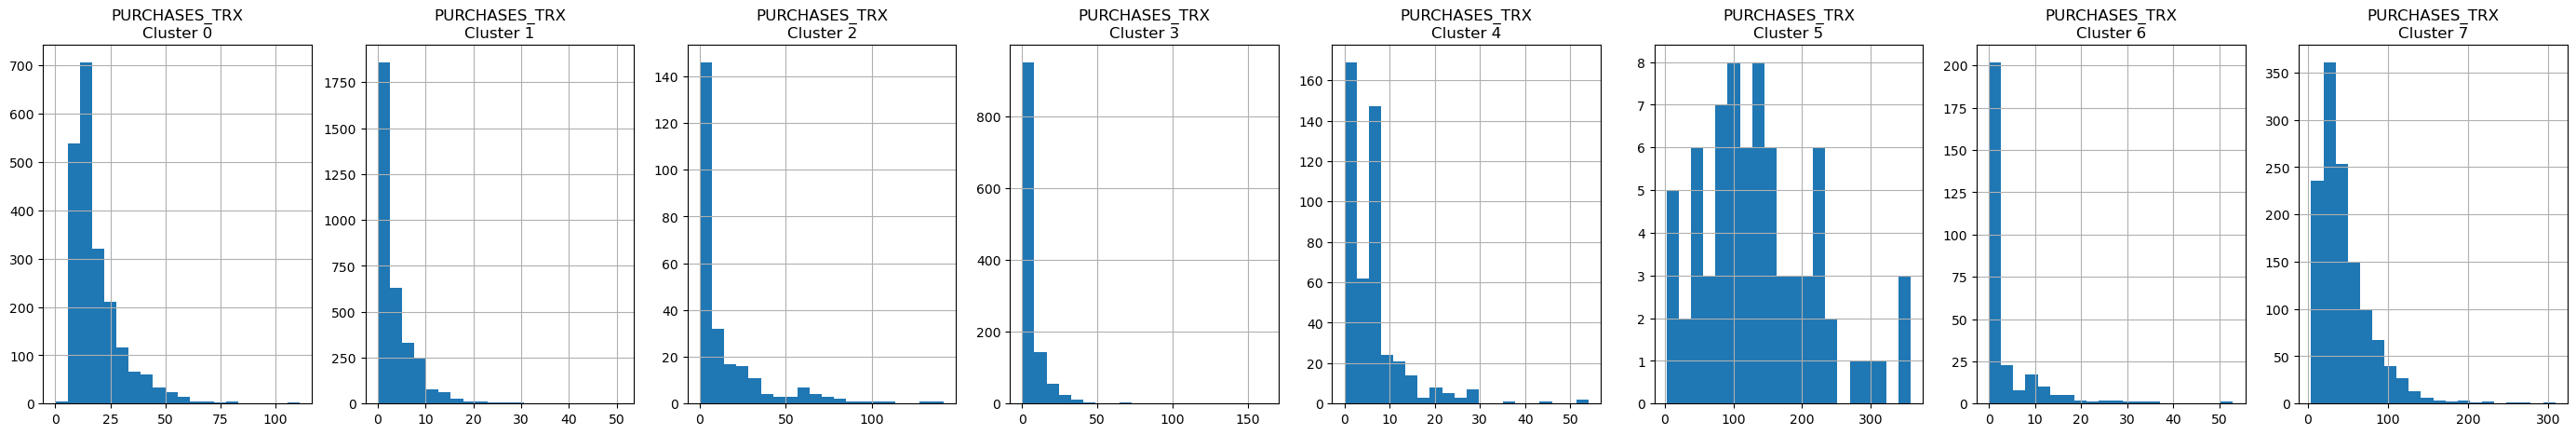

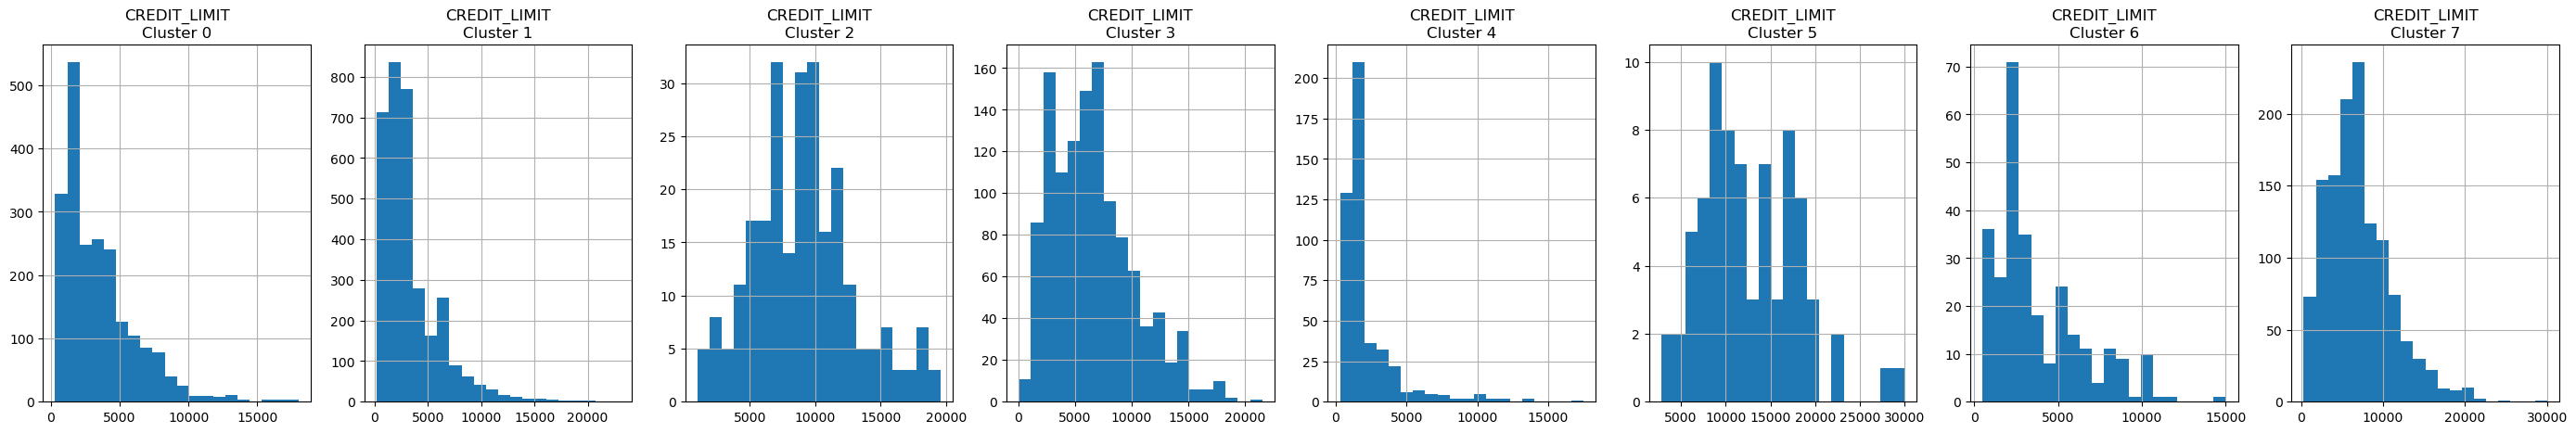

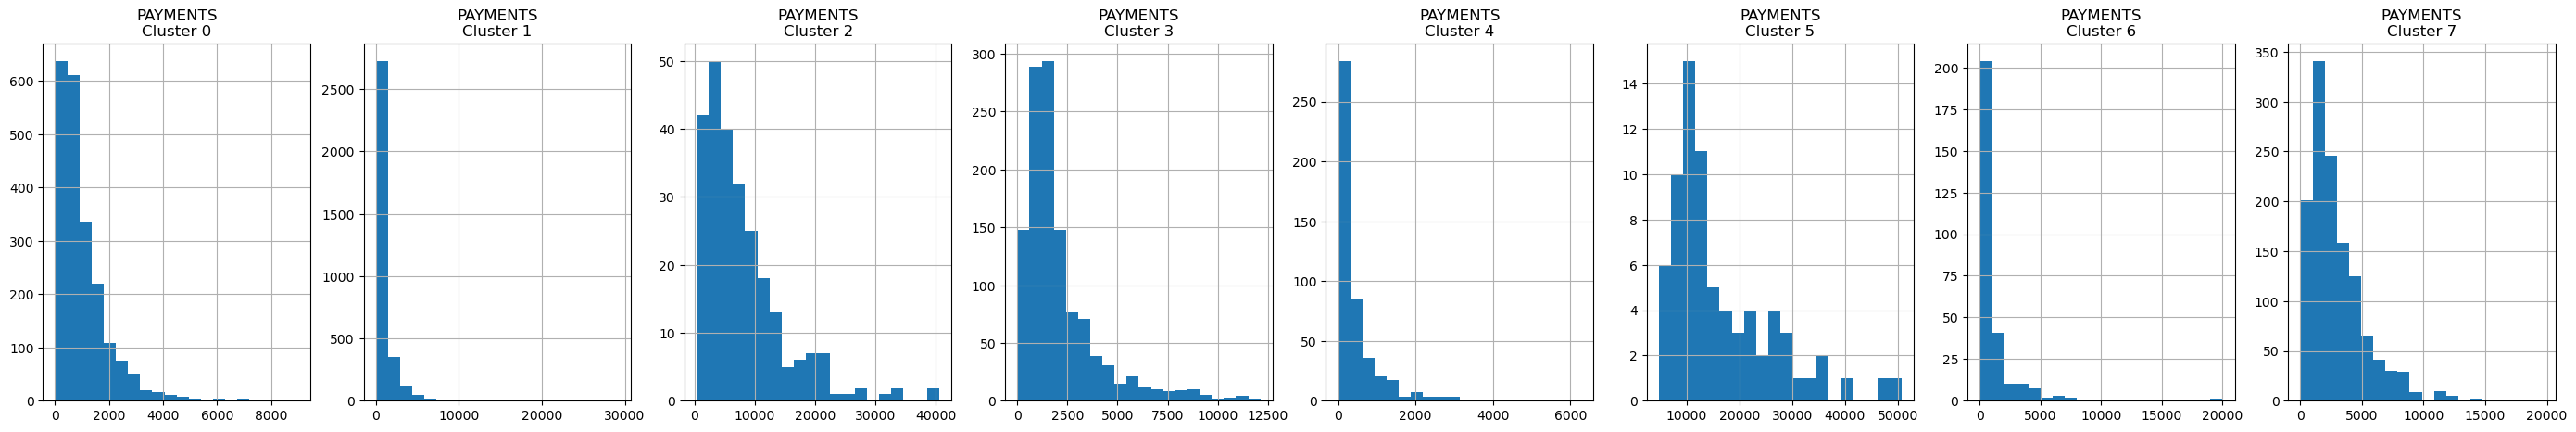

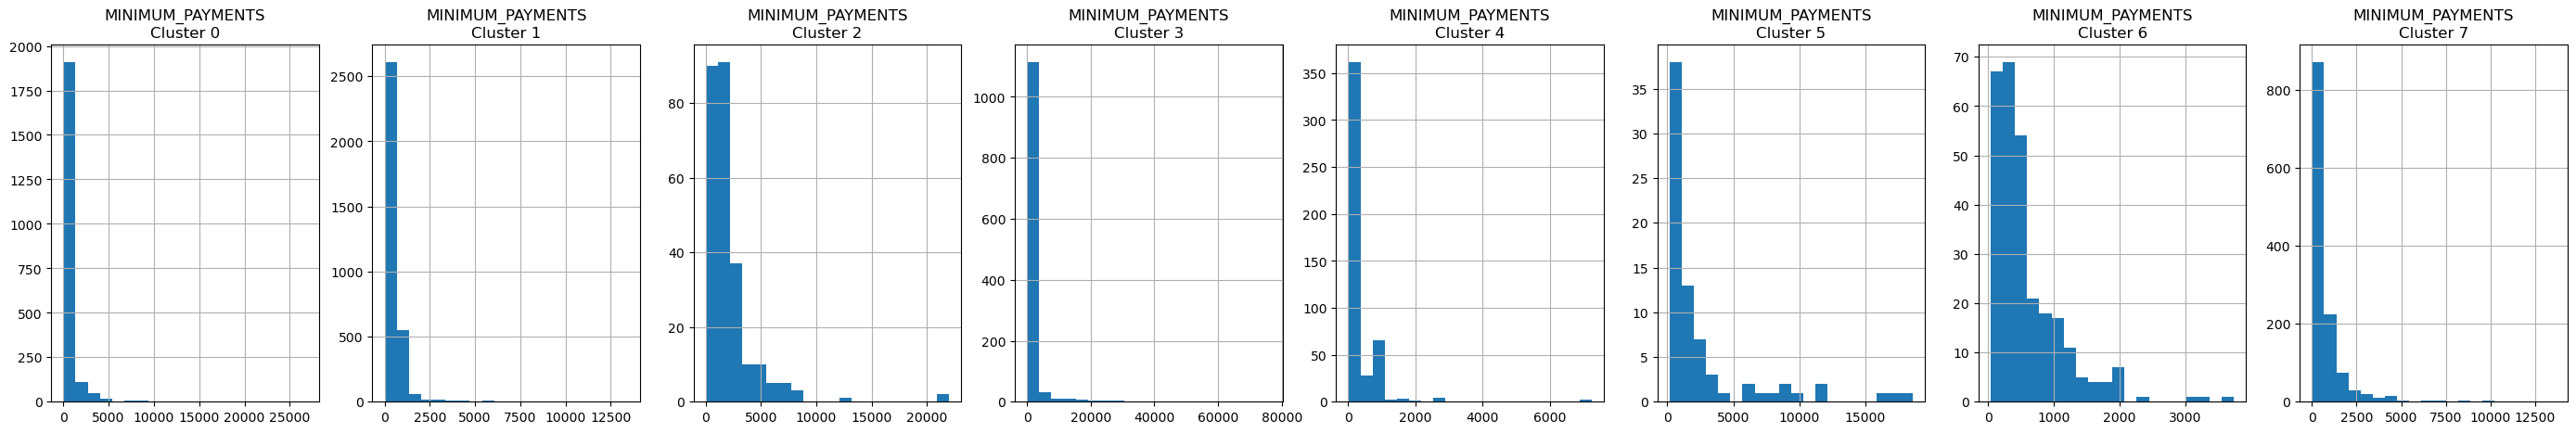

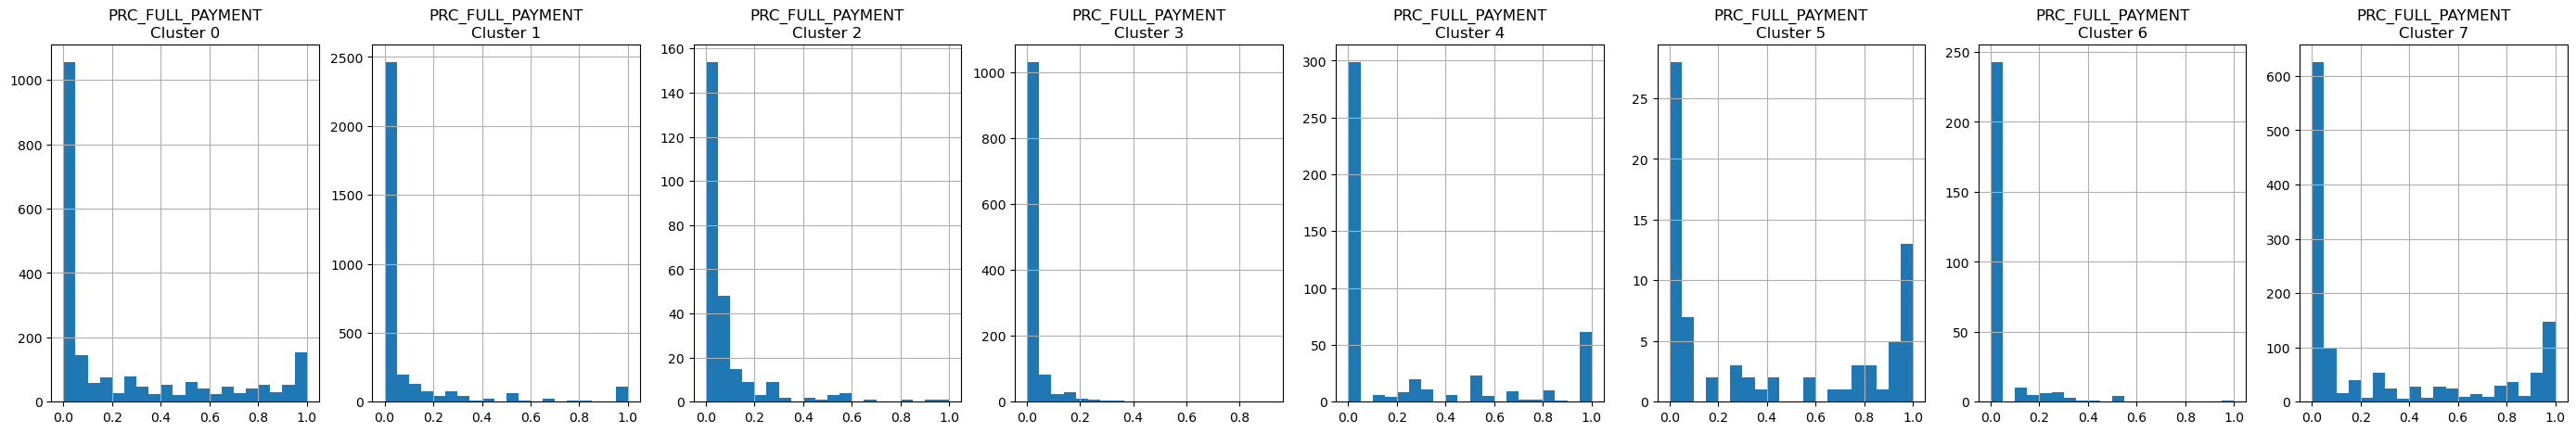

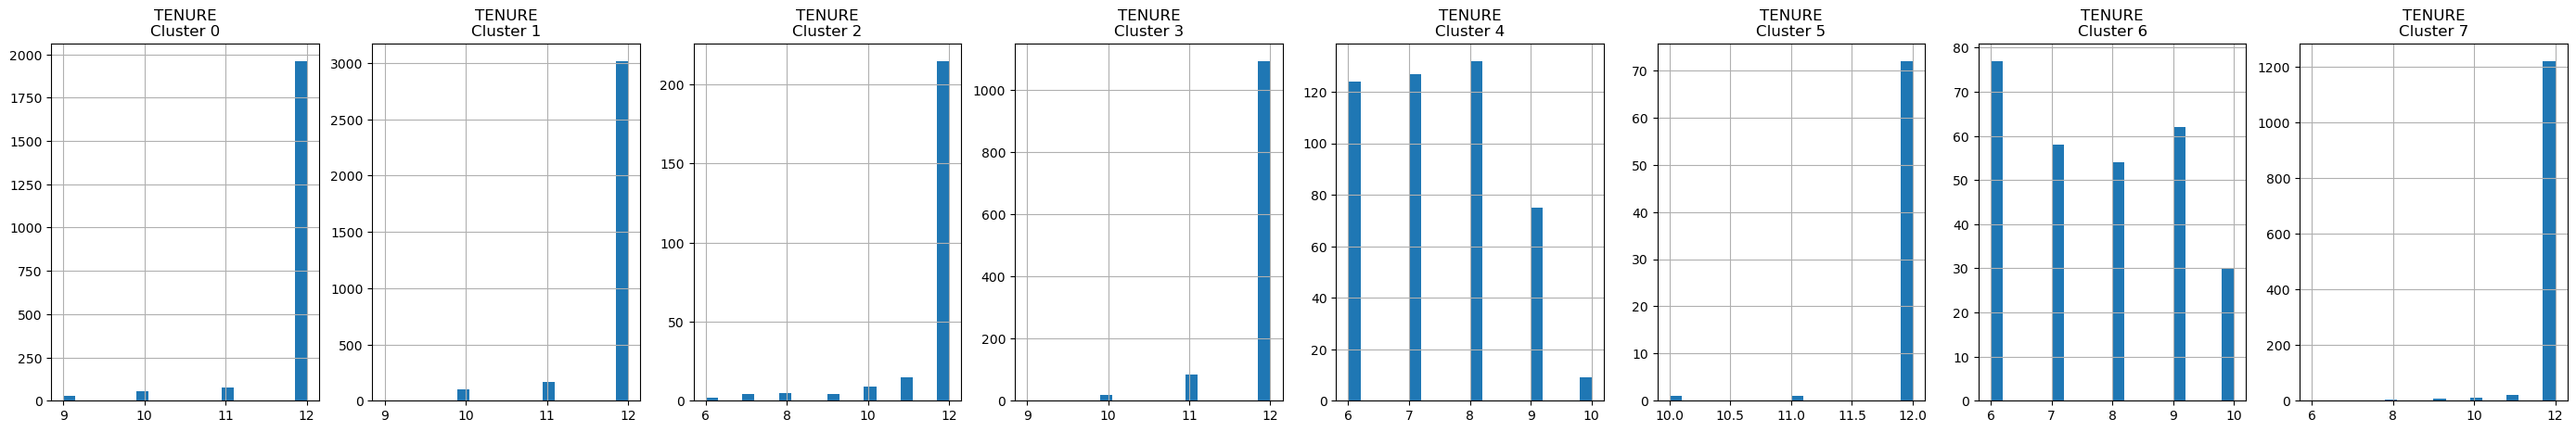

In [27]:
# Plot histograms for each feature across different clusters
for column in creditcard_df.columns:
    plt.figure(figsize=(35, 5))
    for cluster_num in range(8):
        plt.subplot(1, 8, cluster_num + 1)
        cluster_data = creditcard_df_cluster[creditcard_df_cluster['cluster'] == cluster_num]
        cluster_data[column].hist(bins=20)
        plt.title(f'{column}\nCluster {cluster_num}')
    plt.show()

---

<a name="apply-principal-component-analysis-and-visualize-the-results"></a>
## 5. Apply Principal Component Analysis and Visualize the Results

In [28]:
# Calculate the principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)

# Display the principal components
principal_comp

array([[-1.68222037, -1.07645338],
       [-1.13829839,  2.5064601 ],
       [ 0.96968015, -0.3835291 ],
       ...,
       [-0.92620325, -1.81078555],
       [-2.33654897, -0.657958  ],
       [-0.55642193, -0.40046061]])

In [29]:
# Create a DataFrame containing the two principal components
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2'])

# Display the first few rows of the DataFrame
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076453
1,-1.138298,2.506460
2,0.969680,-0.383529
3,-0.873627,0.043164
4,-1.599434,-0.688583


In [30]:
# Add the cluster labels to the PCA DataFrame
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)

# Display the first few rows of the updated DataFrame
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076453,1
1,-1.138298,2.506460,3
2,0.969680,-0.383529,7
3,-0.873627,0.043164,1
4,-1.599434,-0.688583,1


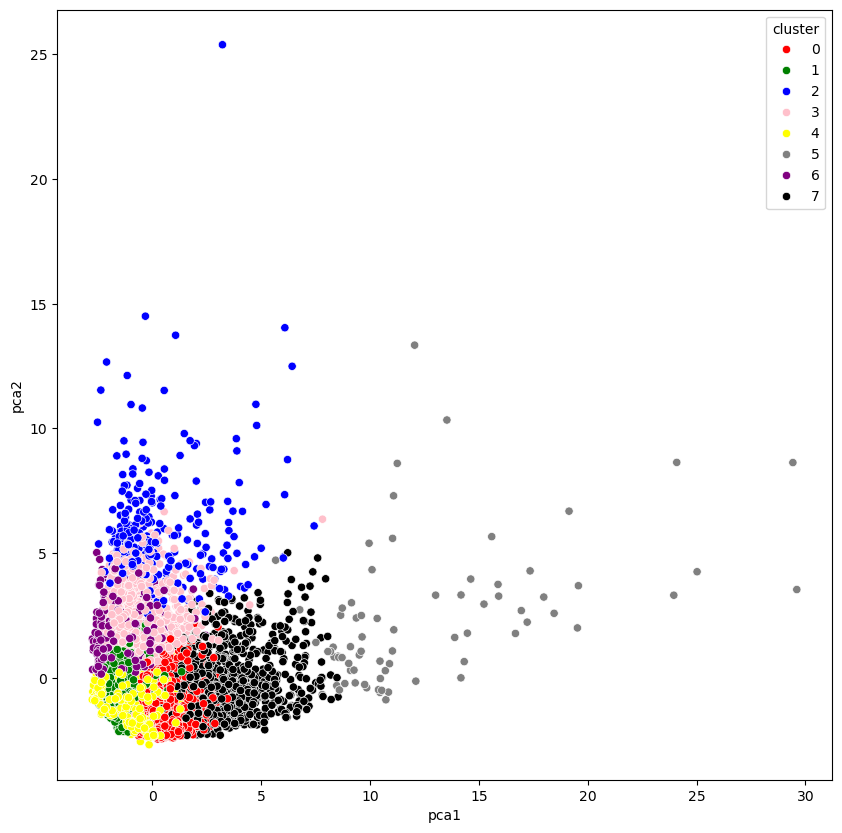

In [31]:
# Plot a scatter plot of the two principal components, colored by cluster
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(
    x="pca1", 
    y="pca2", 
    hue="cluster", 
    data=pca_df, 
    palette=['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black']
)

# Display the plot
plt.show()

---

<a name="apply-autoencoders-for-dimensionality-reduction"></a>
## 6. Apply Autoencoders for Dimensionality Reduction

In [32]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform

# Define encoding dimension
encoding_dim = 7

# Input layer
input_df = Input(shape=(17,))

# Encoder network
x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

# Decoder network
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

# Autoencoder model
autoencoder = Model(inputs=input_df, outputs=decoded)

# Encoder model (for dimensionality reduction)
encoder = Model(inputs=input_df, outputs=encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# Display the shape of the scaled credit card DataFrame
creditcard_df_scaled.shape

(8950, 17)

In [34]:
# Train the autoencoder model on the scaled credit card dataset
# with a batch size of 128 for 25 epochs, providing progress updates after each epoch.
autoencoder.fit(
    creditcard_df_scaled, 
    creditcard_df_scaled, 
    batch_size=128, 
    epochs=25, 
    verbose=1
)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.8054
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3223
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2336
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2004
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1905
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1639
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1455
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1305
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1173
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1096
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1112
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1016
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0858
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0872
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0750
Epoc

In [35]:
# Save the trained weights of the autoencoder model with the correct file extension
autoencoder.save_weights('autoencoder.weights.h5')

In [36]:
# Use the encoder to predict (transform) the scaled credit card data and display the shape of the result
pred = encoder.predict(creditcard_df_scaled)
pred.shape

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(8950, 10)

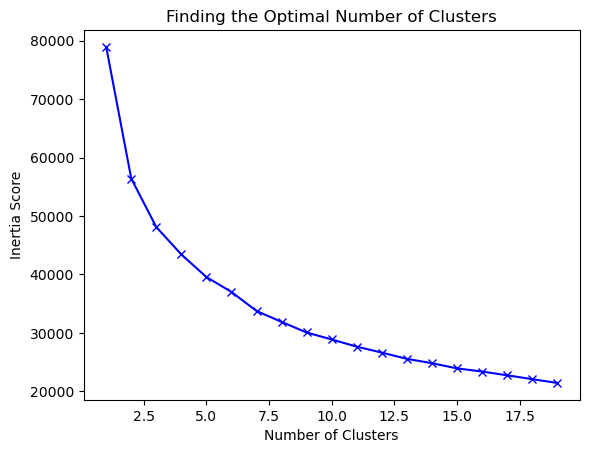

In [37]:
# Determine the optimal number of clusters using the Elbow Method
scores_2 = []
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)

# Plot the inertia scores for each number of clusters
plt.plot(range_values, scores_2, 'bx-')
plt.title('Finding the Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.show()

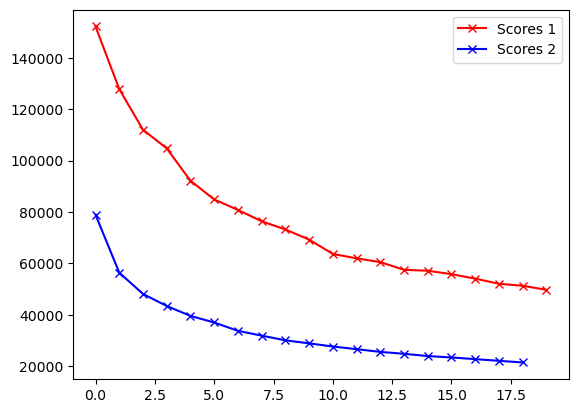

In [38]:
# Plot two sets of scores with different colors for comparison
plt.plot(scores_1, color='red', marker='x', linestyle='-', label='Scores 1')
plt.plot(scores_2, color='blue', marker='x', linestyle='-', label='Scores 2')

# Add legend for clarity
plt.legend()
plt.show()

In [39]:
# Initialize KMeans with 4 clusters
kmeans = KMeans(n_clusters=4)

# Fit the KMeans model on the encoded data and get cluster labels
kmeans.fit(pred)
labels = kmeans.labels_

# Predict cluster labels for the scaled dataset
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [40]:
# Add the cluster labels to the original DataFrame
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis=1)

# Display the first few rows of the DataFrame with cluster labels
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [41]:
# Apply PCA to reduce the encoded data to 2 principal components
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=prin_comp, columns=['pca1', 'pca2'])

# Display the first few rows of the PCA DataFrame
pca_df.head()

,pca1,pca2
0,-1.638299,-0.141807
1,1.941148,-1.222292
2,-1.002776,0.300520
3,0.380455,-0.296538
4,-1.393902,-0.228542


In [42]:
# Add the cluster labels to the PCA DataFrame
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)

# Display the first few rows of the updated PCA DataFrame
pca_df.head()

,pca1,pca2,cluster
0,-1.638299,-0.141807,3
1,1.941148,-1.222292,0
2,-1.002776,0.300520,3
3,0.380455,-0.296538,0
4,-1.393902,-0.228542,3


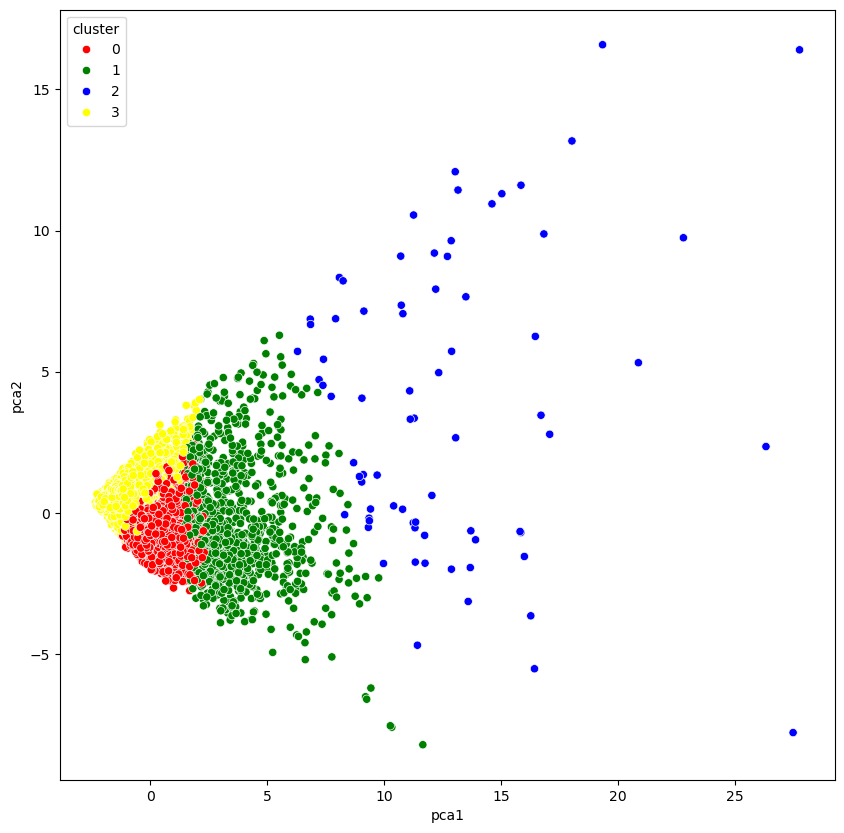

In [43]:
# Plot a scatter plot of the principal components with clusters colored differently
plt.figure(figsize=(10, 10))
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df, palette=['red', 'green', 'blue', 'yellow'])

# Display the plot
plt.show()

---

<!-- Recommendations section begins here -->
<a name="conclusions-and-recommendations"></a>

## 7. Conclusions and Recommendations

### Conclusions

Comparing the K-Means model with and without the autoencoder reveals a balance between cluster effectiveness and interpretability:

- **K-Means (Direct Clustering)**: This approach, though producing slightly less distinct clusters, offers much greater interpretability by using real-world metrics (e.g., balance, spending frequency, cash advances). This clarity is crucial for actionable insights and practical recommendations.

- **K-Means (With Autoencoder)**: This approach creates more distinct clusters, capturing subtle patterns within the data, and is effective for identifying latent customer behaviors. However, it is less interpretable, as clusters are based on transformed features rather than the original data.

In summary, while the autoencoder approach yields slightly clearer clusters, the direct clustering method’s interpretability makes it more practical for applications where understanding customer behavior iion, engagement, and profitability across segments.
ioment, and increase profitability for each segment.


#### Recommendations for Clusters in K-Means (Direct Clustering)

##### 1. **Low Engagement Customers** (Clusters 5 and 7)
   - **Characteristics**: Low balances, minimal spending, low engagement.
   - **Recommendations**: Encourage usage through incentives.
     - **Introductory Offers**: Cash-back rewards or bonus points for initial purchases.
     - **Incentives**: Discounts or loyalty points for consistent use.
     - **Educational Campaigns**: Highlight benefits of regular card usage.

##### 2. **Cash Advance-Focused Users** (Clusters 2 and 3)
   - **Characteristics**: High reliance on cash advances, high balances, low full payments.
   - **Recommendations**: Support with structured payments and financial education.
     - **Repayment Plans**: Offer installment options for cash advances.
     - **Rate Reductions**: Lower cash advance rates for consistent payments.
     - **Financial Education**: Resources on managing credit effectively.

##### 3. **Moderate Spenders with Installments** (Clusters 0 and 4)
   - **Characteristics**: Moderate balances, frequent installment purchases, regular payments.
   - **Recommendations**: Offer loyalty rewards and installment benefits.
     - **Installment Rewards**: Loyalty points on installment purchases.
     - **Retention Programs**: Rewards for consistent usage.
     - **Flexible Payments**: Options for large purchases.

##### 4. **High-Spending, High-Value Customers** (Clusters 1 and 6)
   - **Characteristics**: High balances, high spending, frequent payments.
   - **Recommendations**: Provide premium rewards and personalized services.
     - **Premium Rewards**: Travel benefits, concierge services, and high cash-back.
     - **Credit Limit Increases**: Increased limits to support spending.
     - **Personalized Perks**: VIP events, dining privileges, tailored services.

These targeted strategies can improve customer satisfaction, boost engagement, and increase profitability for each segment.